# Weather Bigdata Contest 2020

In [1]:
import numpy as np
import pandas as pd

In [153]:
pd.set_option('display.max_columns',40)

In [25]:
df_plant1_train = pd.read_csv("data/plant1_lagged_train.csv",encoding = 'utf-8',index_col = 0)
df_plant2_train = pd.read_csv("data/plant2_lagged_train.csv",encoding = 'utf-8',index_col = 0)
df_plant_test = pd.read_csv("data/plant_test.csv",index_col = 0)

In [106]:
#관측기간 관측 단위
#2016-04-01 0:00 ~ 2016-12-26 21:00 -> 3시간
#2016-12-26 22:00 ~ 2018-03-22 0:00 -> 1시간
#2018-03-22 0:30 ~ 2018-06-12 0:00 -> 30분
#2018-06-12 0:10 ~ 2020-03-31 23:50 -> 10분

In [26]:
common_index = ['mea_ddhr', 'plant','tem_in_loc1', 'hum_in_loc1', 'tem_coil_loc1',
                'tem_in_loc2', 'hum_in_loc2', 'tem_coil_loc2', 
                'tem_in_loc3','hum_in_loc3', 'tem_coil_loc3', 
                'tem_out_loc1', 'hum_out_loc1']

In [44]:
loc1_index = ['cond_loc1','x24h_cond_loc1','x48h_cond_loc1']
loc2_index = ['cond_loc2','x24h_cond_loc2','x48h_cond_loc2']
loc3_index = ['cond_loc3','x24h_cond_loc3','x48h_cond_loc3']

In [45]:
df_plant1_train['plant'] = 1

df_11 = df_plant1_train[common_index+loc1_index].rename(columns = {'cond_loc1':'cond_loc','x24h_cond_loc1':'x24h_cond_loc','x48h_cond_loc1':'x48h_cond_loc'})
df_11['loc'] = 1

df_12 = df_plant1_train[common_index+loc2_index].rename(columns = {'cond_loc2':'cond_loc','x24h_cond_loc2':'x24h_cond_loc','x48h_cond_loc2':'x48h_cond_loc'})
df_12['loc'] = 2

df_13 = df_plant1_train[common_index+loc3_index].rename(columns = {'cond_loc3':'cond_loc','x24h_cond_loc3':'x24h_cond_loc','x48h_cond_loc3':'x48h_cond_loc'})
df_13['loc'] = 3

df_plant2_train['plant'] = 2

df_21 = df_plant2_train[common_index+loc1_index].rename(columns = {'cond_loc1':'cond_loc','x24h_cond_loc1':'x24h_cond_loc','x48h_cond_loc1':'x48h_cond_loc'})
df_21['loc'] = 1

df_22 = df_plant2_train[common_index+loc2_index].rename(columns = {'cond_loc2':'cond_loc','x24h_cond_loc2':'x24h_cond_loc','x48h_cond_loc2':'x48h_cond_loc'})
df_22['loc'] = 2

df_23 = df_plant2_train[common_index+loc3_index].rename(columns = {'cond_loc3':'cond_loc','x24h_cond_loc3':'x24h_cond_loc','x48h_cond_loc3':'x48h_cond_loc'})
df_23['loc'] = 3

In [46]:
common_index2 = ['mea_ddhr', 'plant','loc',
                'tem_in_loc1', 'hum_in_loc1', 'tem_coil_loc1',
                'tem_in_loc2', 'hum_in_loc2', 'tem_coil_loc2', 
                'tem_in_loc3','hum_in_loc3', 'tem_coil_loc3', 
                'tem_out_loc1', 'hum_out_loc1',
                'cond_loc','x24h_cond_loc','x48h_cond_loc']

In [47]:
df_plant_train = pd.concat([df_11,df_12,df_13,df_21,df_22,df_23])[common_index2]

In [48]:
df_plant_train_nona = df_plant_train.dropna()

In [108]:
import numpy as np

In [49]:
df_plant_train_nona['month'] = df_plant_train_nona.mea_ddhr.apply(lambda x: x[5:7])
df_plant_train_nona['time'] = df_plant_train_nona.mea_ddhr.apply(lambda x: x[11:13])

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cond_loc
month,
01,97.0
02,410.0
03,271.0
04,80.0
05,250.0
06,10.0
07,6.0
08,4.0
09,0.0


In [53]:
import matplotlib.pyplot as plt

In [105]:
df_plant_train_nona.columns

Index(['mea_ddhr', 'plant', 'loc', 'tem_in_loc1', 'hum_in_loc1',
       'tem_coil_loc1', 'tem_in_loc2', 'hum_in_loc2', 'tem_coil_loc2',
       'tem_in_loc3', 'hum_in_loc3', 'tem_coil_loc3', 'tem_out_loc1',
       'hum_out_loc1', 'cond_loc', 'x24h_cond_loc', 'x48h_cond_loc', 'month',
       'time'],
      dtype='object')

In [114]:
df_plot_tem_m

,index,tem_in_loc
0,0,4.122763
1,1,4.970452
2,2,10.226526
3,3,15.711305
4,4,20.947706
5,5,25.149093
6,6,29.380571
7,7,30.582208
8,8,25.109621
9,9,18.431339


In [119]:
df_plot_coil_m = df_plant_train_nona[['month','tem_coil_loc2','tem_coil_loc2','tem_coil_loc2']].groupby('month').mean().mean(axis=1)
df_plot_coil_m = pd.DataFrame(df_plot_coil_m,columns = ['temp_coil']).reset_index()

In [120]:
df_plot_coil_m

,month,temp_coil
0,01,3.201742
1,02,4.013626
2,03,9.201731
3,04,14.572730
4,05,20.176276
5,06,24.567028
6,07,28.859667
7,08,30.607682
8,09,24.998548
9,10,18.292828


In [132]:
df_plot_coil_m = df_plant_train_nona[['month','tem_coil_loc2','tem_coil_loc2','tem_coil_loc2']].groupby('month').mean().mean(axis=1)
df_plot_coil_m = pd.DataFrame(df_plot_coil_m,columns = ['temp_coil']).reset_index()

df_plot_cond_m = df_plant_train_nona[['month','cond_loc']].groupby('month').sum().reset_index()

df_plot_hum_m = df_plant_train_nona[['month','hum_in_loc1','hum_in_loc2','hum_in_loc3']].groupby('month').mean().mean(axis=1)
df_plot_hum_m = pd.DataFrame(df_plot_hum_m,columns = ['hum_in_loc']).reset_index()

df_plot_tem_m = df_plant_train_nona[['month','tem_in_loc1','tem_in_loc2','tem_in_loc3']].groupby('month').mean().mean(axis=1)
df_plot_tem_m = pd.DataFrame(df_plot_tem_m,columns = ['tem_in_loc']).reset_index()

df_plot_tem_out_m = df_plant_train_nona[['month','tem_out_loc1']].groupby('month').mean().reset_index()

df_plot_hum_out_m = df_plant_train_nona[['month','hum_out_loc1']].groupby('month').mean().reset_index()

round(pd.concat([df_plot_cond_m.set_index('month'),
           df_plot_hum_m.set_index('month'),
          df_plot_coil_m.set_index('month'),
          df_plot_tem_m.set_index('month'),
          df_plot_tem_out_m.set_index('month'),
           df_plot_hum_out_m.set_index('month')],axis=1).T,2)

month,01,02,03,04,05,06,07,08,09,10,11,12
cond_loc,97.00,410.00,271.00,80.00,250.00,10.00,6.00,4.00,0.00,3.00,129.00,724.00
hum_in_loc,45.87,46.06,51.34,51.08,54.78,58.85,64.33,60.71,54.76,49.49,50.46,44.42
temp_coil,3.20,4.01,9.20,14.57,20.18,24.57,28.86,30.61,25.00,18.29,12.09,4.96
tem_in_loc,4.12,4.97,10.23,15.71,20.95,25.15,29.38,30.58,25.11,18.43,12.59,5.28
tem_out_loc1,0.56,1.72,7.56,13.53,18.86,23.05,27.88,28.69,22.65,15.36,9.19,1.52
hum_out_loc1,56.82,56.81,61.21,59.12,62.64,67.26,70.91,67.79,63.06,59.44,61.91,55.80


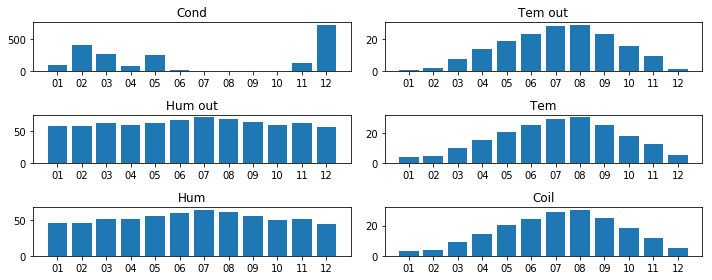

In [159]:
plt.figure(figsize =(10,4))
plt.subplot(3,2,1)
plt.bar(df_plot_cond_m.month,df_plot_cond_m.cond_loc)
plt.title('Cond')

plt.subplot(3,2,5)
plt.bar(df_plot_hum_m.month,df_plot_hum_m.hum_in_loc)
plt.title('Hum')

plt.subplot(3,2,3)
plt.bar(df_plot_hum_out_m.month,df_plot_hum_out_m.hum_out_loc1)
plt.title('Hum out')
plt.tight_layout()

plt.subplot(3,2,4)
plt.bar(df_plot_tem_m.month,df_plot_tem_m.tem_in_loc)
plt.title('Tem')

plt.subplot(3,2,2)
plt.bar(df_plot_tem_out_m.month,df_plot_tem_out_m.tem_out_loc1)
plt.title('Tem out')
plt.tight_layout()

plt.subplot(3,2,6)
plt.bar(df_plot_coil_m.month,df_plot_coil_m.temp_coil)
plt.title('Coil')
plt.tight_layout()

In [154]:
df_plot_coil_t = df_plant_train_nona[['time','tem_coil_loc2','tem_coil_loc2','tem_coil_loc2']].groupby('time').mean().mean(axis=1)
df_plot_coil_t = pd.DataFrame(df_plot_coil_t,columns = ['temp_coil']).reset_index()

df_plot_cond_t = df_plant_train_nona[['time','cond_loc']].groupby('time').sum().reset_index()

df_plot_hum_t = df_plant_train_nona[['time','hum_in_loc1','hum_in_loc2','hum_in_loc3']].groupby('time').mean().mean(axis=1)
df_plot_hum_t = pd.DataFrame(df_plot_hum_t,columns = ['hum_in_loc']).reset_index()

df_plot_tem_t = df_plant_train_nona[['time','tem_in_loc1','tem_in_loc2','tem_in_loc3']].groupby('time').mean().mean(axis=1)
df_plot_tem_t = pd.DataFrame(df_plot_tem_t,columns = ['tem_in_loc']).reset_index()

df_plot_tem_out_t = df_plant_train_nona[['time','tem_out_loc1']].groupby('time').mean().reset_index()

df_plot_hum_out_t = df_plant_train_nona[['time','hum_out_loc1']].groupby('time').mean().reset_index()

round(pd.concat([df_plot_cond_t.set_index('time'),
           df_plot_hum_t.set_index('time'),
          df_plot_coil_t.set_index('time'),
          df_plot_tem_t.set_index('time'),
          df_plot_tem_out_t.set_index('time'),
           df_plot_hum_out_t.set_index('time')],axis=1).T,2)

time,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
cond_loc,76.00,79.00,79.00,82.00,47.00,33.00,41.00,44.00,49.00,76.00,70.00,92.00,118.00,110.00,114.00,122.00,120.00,109.00,107.00,99.00,86.00,82.00,76.00,73.00
hum_in_loc,55.32,55.45,55.87,56.71,56.57,56.84,57.66,57.12,56.47,55.80,53.25,50.92,49.57,47.46,46.40,46.27,46.09,46.79,48.49,49.86,51.48,52.95,53.58,54.36
temp_coil,16.37,15.86,15.82,16.17,15.71,15.66,15.97,15.54,15.53,15.96,15.62,15.68,16.21,15.84,15.93,16.45,16.03,16.05,16.54,16.08,16.06,16.50,16.01,16.07
tem_in_loc,16.21,15.49,15.28,15.55,14.91,14.73,15.03,14.58,14.88,15.84,16.13,16.80,17.81,17.87,18.23,18.82,18.36,18.16,18.27,17.35,16.94,17.07,16.27,16.10
tem_out_loc1,12.03,11.23,10.96,11.21,10.47,10.24,10.68,11.18,13.53,16.22,17.56,17.85,17.84,16.84,16.59,16.78,15.80,15.17,14.97,13.69,13.09,13.15,12.22,11.97
hum_out_loc1,70.70,71.52,72.36,73.19,73.72,74.48,74.78,70.81,62.42,54.91,48.34,46.52,47.91,48.72,49.33,50.57,52.40,54.91,58.28,61.77,64.62,66.61,68.13,69.37


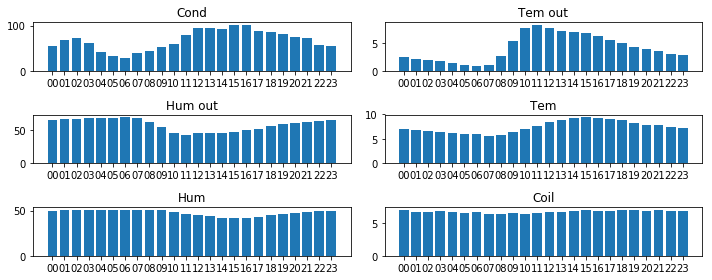

In [157]:
plt.figure(figsize =(10,4))
plt.subplot(3,2,1)
plt.bar(df_plot_cond_t.time,df_plot_cond_t.cond_loc)
plt.title('Cond')

plt.subplot(3,2,5)
plt.bar(df_plot_hum_t.time,df_plot_hum_t.hum_in_loc)
plt.title('Hum')

plt.subplot(3,2,3)
plt.bar(df_plot_hum_out_t.time,df_plot_hum_out_t.hum_out_loc1)
plt.title('Hum out')
plt.tight_layout()

plt.subplot(3,2,4)
plt.bar(df_plot_tem_t.time,df_plot_tem_t.tem_in_loc)
plt.title('Tem')

plt.subplot(3,2,2)
plt.bar(df_plot_tem_out_t.time,df_plot_tem_out_t.tem_out_loc1)
plt.title('Tem out')
plt.tight_layout()

plt.subplot(3,2,6)
plt.bar(df_plot_coil_t.time,df_plot_coil_t.temp_coil)
plt.title('Coil')
plt.tight_layout()

In [155]:
df_plant_train_nona_winter = df_plant_train_nona[(df_plant_train_nona['month']=='11')|
                                                (df_plant_train_nona['month']=='12')|
                                                (df_plant_train_nona['month']=='01')|
                                                (df_plant_train_nona['month']=='02')|
                                                (df_plant_train_nona['month']=='03')]

df_plot_coil_t = df_plant_train_nona_winter[['time','tem_coil_loc2','tem_coil_loc2','tem_coil_loc2']].groupby('time').mean().mean(axis=1)
df_plot_coil_t = pd.DataFrame(df_plot_coil_t,columns = ['temp_coil']).reset_index()

df_plot_cond_t = df_plant_train_nona_winter[['time','cond_loc']].groupby('time').sum().reset_index()

df_plot_hum_t = df_plant_train_nona_winter[['time','hum_in_loc1','hum_in_loc2','hum_in_loc3']].groupby('time').mean().mean(axis=1)
df_plot_hum_t = pd.DataFrame(df_plot_hum_t,columns = ['hum_in_loc']).reset_index()

df_plot_tem_t = df_plant_train_nona_winter[['time','tem_in_loc1','tem_in_loc2','tem_in_loc3']].groupby('time').mean().mean(axis=1)
df_plot_tem_t = pd.DataFrame(df_plot_tem_t,columns = ['tem_in_loc']).reset_index()

df_plot_tem_out_t = df_plant_train_nona_winter[['time','tem_out_loc1']].groupby('time').mean().reset_index()

df_plot_hum_out_t = df_plant_train_nona_winter[['time','hum_out_loc1']].groupby('time').mean().reset_index()

round(pd.concat([df_plot_cond_t.set_index('time'),
           df_plot_hum_t.set_index('time'),
          df_plot_coil_t.set_index('time'),
          df_plot_tem_t.set_index('time'),
          df_plot_tem_out_t.set_index('time'),
           df_plot_hum_out_t.set_index('time')],axis=1).T,2)

time,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
cond_loc,54.00,69.00,72.00,62.00,41.00,32.00,29.00,39.00,44.00,52.00,60.00,79.00,95.00,94.00,92.00,102.00,101.00,89.00,86.00,81.00,75.00,72.00,57.00,54.00
hum_in_loc,49.83,50.19,50.46,50.67,50.72,50.82,51.08,51.23,50.98,50.24,48.81,46.63,45.03,43.51,42.38,41.94,42.16,42.99,44.66,46.06,47.45,48.56,49.06,49.60
temp_coil,6.90,6.71,6.67,6.76,6.57,6.51,6.56,6.38,6.34,6.42,6.34,6.48,6.70,6.64,6.73,6.93,6.83,6.85,7.01,6.87,6.86,7.00,6.82,6.82
tem_in_loc,7.04,6.71,6.53,6.49,6.19,6.00,5.94,5.67,5.79,6.34,6.92,7.70,8.42,8.80,9.17,9.44,9.29,9.06,8.79,8.25,7.91,7.77,7.36,7.18
tem_out_loc1,2.53,2.14,1.89,1.78,1.38,1.11,0.97,0.98,2.69,5.37,7.58,8.19,7.61,7.09,6.92,6.74,6.16,5.53,4.99,4.29,3.81,3.57,3.08,2.80
hum_out_loc1,65.92,66.82,67.41,67.91,68.27,69.06,69.83,69.21,63.18,54.18,45.94,42.99,45.24,45.98,46.25,47.69,49.65,52.57,55.95,58.72,61.26,63.05,63.97,64.96


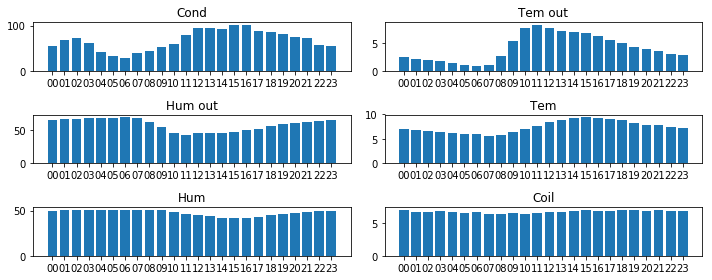

In [156]:
plt.figure(figsize =(10,4))
plt.subplot(3,2,1)
plt.bar(df_plot_cond_t.time,df_plot_cond_t.cond_loc)
plt.title('Cond')

plt.subplot(3,2,5)
plt.bar(df_plot_hum_t.time,df_plot_hum_t.hum_in_loc)
plt.title('Hum')

plt.subplot(3,2,3)
plt.bar(df_plot_hum_out_t.time,df_plot_hum_out_t.hum_out_loc1)
plt.title('Hum out')
plt.tight_layout()

plt.subplot(3,2,4)
plt.bar(df_plot_tem_t.time,df_plot_tem_t.tem_in_loc)
plt.title('Tem')

plt.subplot(3,2,2)
plt.bar(df_plot_tem_out_t.time,df_plot_tem_out_t.tem_out_loc1)
plt.title('Tem out')
plt.tight_layout()

plt.subplot(3,2,6)
plt.bar(df_plot_coil_t.time,df_plot_coil_t.temp_coil)
plt.title('Coil')
plt.tight_layout()

In [165]:
df_plant_train_nona.cond_loc.unique()

array(['0.0', '1.0'], dtype=object)

In [167]:
df_plant_train_nona2['cond_loc'] = df_plant_train_nona['cond_loc'].astype(str)

In [173]:
df_plot_coil_c = df_plant_train_nona[['cond_loc','tem_coil_loc2','tem_coil_loc2','tem_coil_loc2']].groupby('cond_loc').mean().mean(axis=1)
df_plot_coil_c = pd.DataFrame(df_plot_coil_c,columns = ['temp_coil']).reset_index()

df_plot_hum_c = df_plant_train_nona[['cond_loc','hum_in_loc1','hum_in_loc2','hum_in_loc3']].groupby('cond_loc').mean().mean(axis=1)
df_plot_hum_c = pd.DataFrame(df_plot_hum_c,columns = ['hum_in_loc']).reset_index()

df_plot_tem_c = df_plant_train_nona[['cond_loc','tem_in_loc1','tem_in_loc2','tem_in_loc3']].groupby('cond_loc').mean().mean(axis=1)
df_plot_tem_c = pd.DataFrame(df_plot_tem_c,columns = ['tem_in_loc']).reset_index()

df_plot_tem_out_c = df_plant_train_nona[['cond_loc','tem_out_loc1']].groupby('cond_loc').mean().reset_index()

df_plot_hum_out_c = df_plant_train_nona[['cond_loc','hum_out_loc1']].groupby('cond_loc').mean().reset_index()

round(pd.concat([df_plot_hum_c.set_index('cond_loc'),
          df_plot_coil_c.set_index('cond_loc'),
          df_plot_tem_c.set_index('cond_loc'),
          df_plot_tem_out_c.set_index('cond_loc'),
           df_plot_hum_out_c.set_index('cond_loc')],axis=1).T,2)

cond_loc,0.0,1.0
hum_in_loc,52.39,81.13
temp_coil,16.03,10.03
tem_in_loc,16.56,13.19
tem_out_loc1,13.83,12.43
hum_out_loc1,61.78,86.07


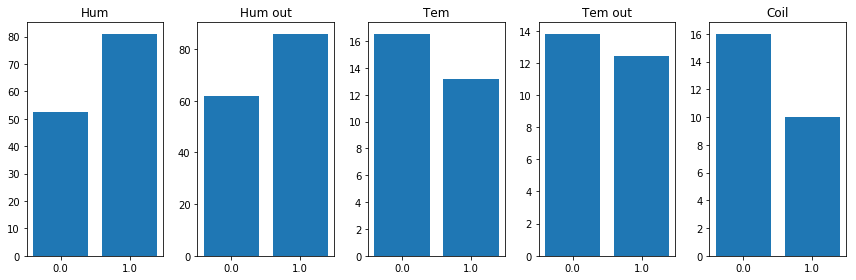

In [183]:
plt.figure(figsize =(12,4))

plt.subplot(1,5,1)
plt.bar(df_plot_hum_c.cond_loc,df_plot_hum_c.hum_in_loc)
plt.title('Hum')

plt.subplot(1,5,2)
plt.bar(df_plot_hum_out_c.cond_loc,df_plot_hum_out_c.hum_out_loc1)
plt.title('Hum out')
plt.tight_layout()

plt.subplot(1,5,3)
plt.bar(df_plot_tem_c.cond_loc,df_plot_tem_c.tem_in_loc)
plt.title('Tem')

plt.subplot(1,5,4)
plt.bar(df_plot_tem_out_c.cond_loc,df_plot_tem_out_c.tem_out_loc1)
plt.title('Tem out')
plt.tight_layout()

plt.subplot(1,5,5)
plt.bar(df_plot_coil_c.cond_loc,df_plot_coil_c.temp_coil)
plt.title('Coil')
plt.tight_layout()

In [184]:
df_plant_train_nona.corr()

,plant,loc,tem_in_loc1,hum_in_loc1,tem_coil_loc1,tem_in_loc2,hum_in_loc2,tem_coil_loc2,tem_in_loc3,hum_in_loc3,tem_coil_loc3,tem_out_loc1,hum_out_loc1,x24h_cond_loc,x48h_cond_loc
plant,1.000000,0.000115,-0.081725,0.094722,-0.038091,0.019716,-0.047544,0.028488,0.056479,-0.217196,0.113849,0.019710,0.080160,-0.029973,-0.029471
loc,0.000115,1.000000,-0.000274,-0.000176,-0.000263,-0.000261,-0.000173,-0.000272,-0.000254,-0.000191,-0.000263,-0.000242,-0.000108,0.005785,0.005286
tem_in_loc1,-0.081725,-0.000274,1.000000,0.428683,0.989128,0.992756,0.387567,0.979570,0.986757,0.400280,0.967731,0.964442,0.169751,-0.039989,-0.050520
hum_in_loc1,0.094722,-0.000176,0.428683,1.000000,0.447158,0.437922,0.973243,0.459261,0.460515,0.924372,0.469289,0.438906,0.809189,0.022730,-0.008024
tem_coil_loc1,-0.038091,-0.000263,0.989128,0.447158,1.000000,0.986024,0.399478,0.995392,0.981446,0.406805,0.985280,0.946093,0.216780,-0.053107,-0.057292
tem_in_loc2,0.019716,-0.000261,0.992756,0.437922,0.986024,1.000000,0.373661,0.985289,0.997766,0.368627,0.982712,0.973685,0.164270,-0.041791,-0.053128
hum_in_loc2,-0.047544,-0.000173,0.387567,0.973243,0.399478,0.373661,1.000000,0.397795,0.391028,0.975473,0.395378,0.373995,0.825729,0.028283,-0.001689
tem_coil_loc2,0.028488,-0.000272,0.979570,0.459261,0.995392,0.985289,0.397795,1.000000,0.983718,0.391983,0.995478,0.942715,0.230465,-0.055714,-0.058521
tem_in_loc3,0.056479,-0.000254,0.986757,0.460515,0.981446,0.997766,0.391028,0.983718,1.000000,0.373708,0.984997,0.973008,0.184451,-0.039663,-0.053615
hum_in_loc3,-0.217196,-0.000191,0.400280,0.924372,0.406805,0.368627,0.975473,0.391983,0.373708,1.000000,0.373285,0.364919,0.792867,0.028257,0.004642


In [188]:
import seaborn as sns

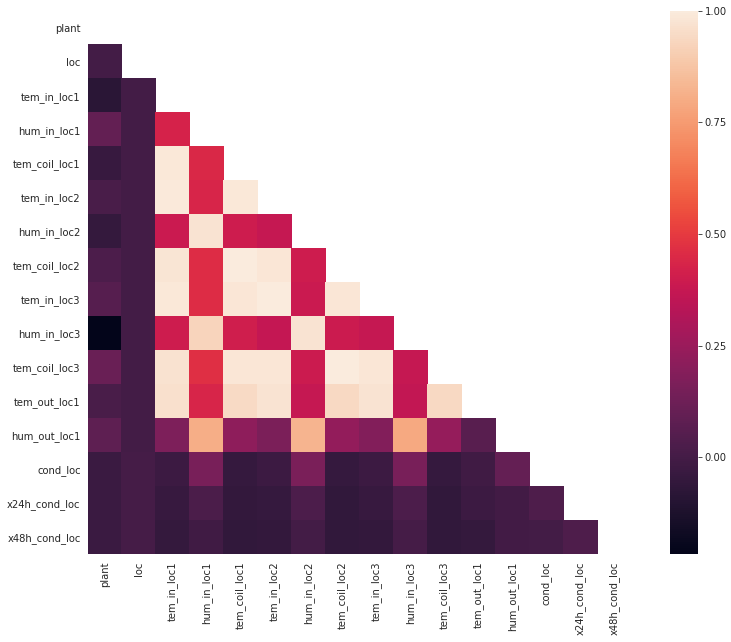

In [195]:
corr = df_plant_train_nona.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr, mask=mask, square=True)